# AON and ACTION ROI Signal Extraction

Master Thesis: **Modulation of the Action Observation Network - Investigating Action, Actor and Observer Factors in an fMRI Study**

Author: Olaf Borghi olafborghi@gmail.com

In this script I will extract the signal from each ROI mask that I created in masking.ipynb. 

Some code was taken/adapted from https://github.com/lrsktr/tewa-neuroimaging/blob/main/08_masking-and-extracting-signals/08_masking-extracting-signals.ipynb

## Prepare Setup

### Define fixed parameters, load libraries/modules

**Load modules**

In [44]:
# Import packages and modules
%matplotlib inline
# libraries
import os
import numpy as np
import nibabel as nib
import pandas as pd
import nilearn as nl
from matplotlib import pyplot as plt
# specific modules
from nipype.interfaces import fsl
from nilearn import plotting, datasets, image
from nilearn.image import math_img
from nilearn.maskers import NiftiLabelsMasker
from pathlib import Path
from pprint import pprint
from glob import glob
print(nl.__version__)

0.9.2


**Set fixed parameters**

In [7]:
# fixed folders

basedir = Path("/home/olafb99/mnt/p/userdata/olafb99/shared/03_AON_ACTION")

outputdir = Path(basedir / "derivatives")
datadir = Path(basedir / "01_data")
first_level_dir = first_level_dir = outputdir / "first_level"
action_first_level_dir = first_level_dir / "action-task"
AON_first_level_dir = first_level_dir / "AON-task"
masks_templates_dir = outputdir / "masks_templates"
second_level_dir = outputdir / "second_level"
AON_second_level_dir = second_level_dir / "AON-task"
action_second_level_dir = second_level_dir / "action-task"
atlas_dir = outputdir / "brain_atlases"
roi_dir = masks_templates_dir / "ROI_masks"

# load the MNI template
template = datasets.load_mni152_template(resolution=1)

### Load the ROI masks

In [21]:
# store the paths
left_ipl_path = roi_dir / "left_ipl_aon_mask.nii.gz"
right_ipl_path = roi_dir / "right_ipl_aon_mask.nii.gz"
left_ifg_path = roi_dir / "left_ifg_aon_mask.nii.gz"
right_ifg_path = roi_dir / "right_ifg_aon_mask.nii.gz"
left_pm_path = roi_dir / "left_pm_aon_mask.nii.gz"
right_pm_path = roi_dir / "right_pm_aon_mask.nii.gz"
left_m1_path = roi_dir / "left_m1_aon_mask.nii.gz"

# load the images
left_ipl = nib.load(left_ipl_path)
right_ipl = nib.load(right_ipl_path)
left_ifg = nib.load(left_ifg_path)
right_ifg = nib.load(right_ifg_path)
left_pm = nib.load(left_pm_path)
right_pm = nib.load(right_pm_path)
left_m1 = nib.load(left_m1_path)


roi_masks = [left_ipl, right_ipl, left_ifg, right_ifg, left_pm, right_pm, left_m1]

Plot the roi masks once more just as a sanity check

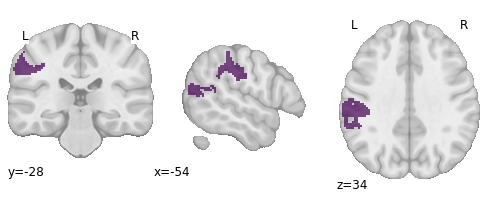

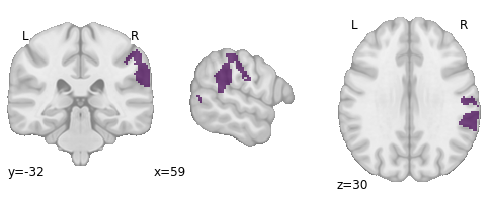

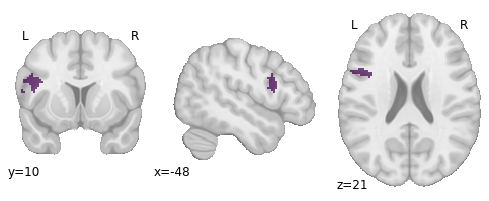

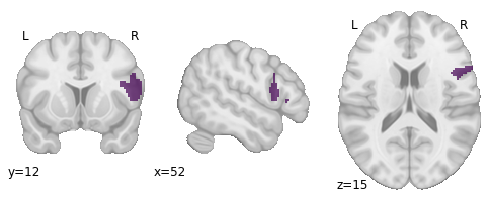

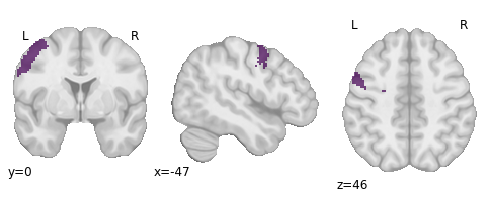

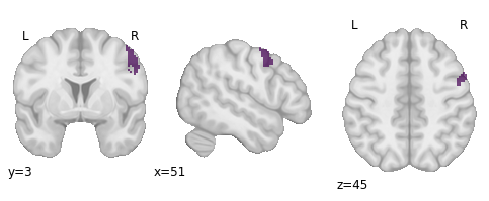

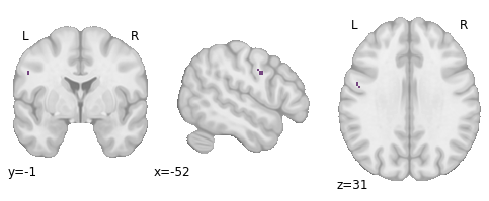

In [22]:
for roi in roi_masks:
    plotting.plot_roi(roi, draw_cross=False, bg_img = template, cmap="viridis", black_bg = False)

### Load the first level contrasts

In [23]:
# contrasts of interest
# human transitive - baseline
cmaps_transitive_baseline_human = sorted(
    glob(f"{AON_first_level_dir}/human_transitive-baseline/*.nii.gz",
         recursive=True)
)

# human intransitive - baseline
cmaps_intransitive_baseline_human = sorted(
    glob(f"{AON_first_level_dir}/human_intransitive-baseline/*.nii.gz",
         recursive=True)
)

# dog transitive - baseline
cmaps_transitive_baseline_dog = sorted(
    glob(f"{AON_first_level_dir}/dog_transitive-baseline/*.nii.gz",
         recursive=True)
)

# dog intransitive - baseline
cmaps_intransitive_baseline_dog = sorted(
    glob(f"{AON_first_level_dir}/dog_intransitive-baseline/*.nii.gz",
         recursive=True)
)

## Extract the signal from each region

I start by defining a function that makes it easier to extract the signal later on.

In [58]:
def extract_roi(cmaps, mask):
  '''extract mean roi activation from contrast map
    
     Input: 
     - List of contract maps 
     - ROI mask

    Output: Time series
  '''

  # instantiate numpy array to store results
  out = np.zeros(len(cmaps))

  # setup masker
  masker = NiftiLabelsMasker(mask)

  # loop over subjects
  print("Start extracting mean signal for each contrast map")
  for i, cmap in enumerate(cmaps):
    out[i] = masker.fit_transform(cmap)
  print("Done extracting mean signal for each contrast map")
    
  return out

Extract the signal from each region in each of the conditions using this function

**Human transitive vs. baseline**

In [59]:
# inferior parietal lobule
left_ipl_transitive_human_signal = extract_roi(cmaps_transitive_baseline_human, left_ipl)
right_ipl_transitive_human_signal = extract_roi(cmaps_transitive_baseline_human, right_ipl)

# inferior frontal gyrus
left_ifg_transitive_human_signal = extract_roi(cmaps_transitive_baseline_human, left_ifg)
right_ifg_transitive_human_signal = extract_roi(cmaps_transitive_baseline_human, right_ifg)

# premotor cortex
left_pm_transitive_human_signal = extract_roi(cmaps_transitive_baseline_human, left_pm)
right_pm_transitive_human_signal = extract_roi(cmaps_transitive_baseline_human, right_pm)

# primary motor cortex
left_m1_transitive_human_signal = extract_roi(cmaps_transitive_baseline_human, left_m1)

Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map


**Human intransitive vs. baseline**

In [60]:
# inferior parietal lobule
left_ipl_intransitive_human_signal = extract_roi(cmaps_intransitive_baseline_human, left_ipl)
right_ipl_intransitive_human_signal = extract_roi(cmaps_intransitive_baseline_human, right_ipl)

# inferior frontal gyrus
left_ifg_intransitive_human_signal = extract_roi(cmaps_intransitive_baseline_human, left_ifg)
right_ifg_intransitive_human_signal = extract_roi(cmaps_intransitive_baseline_human, right_ifg)

# premotor cortex
left_pm_intransitive_human_signal = extract_roi(cmaps_intransitive_baseline_human, left_pm)
right_pm_intransitive_human_signal = extract_roi(cmaps_intransitive_baseline_human, right_pm)

# primary motor cortex
left_m1_intransitive_human_signal = extract_roi(cmaps_intransitive_baseline_human, left_m1)

Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map


**Dog transitive vs baseline**

In [61]:
# inferior parietal lobule
left_ipl_transitive_dog_signal = extract_roi(cmaps_transitive_baseline_dog, left_ipl)
right_ipl_transitive_dog_signal = extract_roi(cmaps_transitive_baseline_dog, right_ipl)

# inferior frontal gyrus
left_ifg_transitive_dog_signal = extract_roi(cmaps_transitive_baseline_dog, left_ifg)
right_ifg_transitive_dog_signal = extract_roi(cmaps_transitive_baseline_dog, right_ifg)

# premotor cortex
left_pm_transitive_dog_signal = extract_roi(cmaps_transitive_baseline_dog, left_pm)
right_pm_transitive_dog_signal = extract_roi(cmaps_transitive_baseline_dog, right_pm)

# primary motor cortex
left_m1_transitive_dog_signal = extract_roi(cmaps_transitive_baseline_dog, left_m1)

Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map


**Dog intransitive vs. baseline**

In [62]:
# inferior parietal lobule
left_ipl_intransitive_dog_signal = extract_roi(cmaps_intransitive_baseline_dog, left_ipl)
right_ipl_intransitive_dog_signal = extract_roi(cmaps_intransitive_baseline_dog, right_ipl)

# inferior frontal gyrus
left_ifg_intransitive_dog_signal = extract_roi(cmaps_intransitive_baseline_dog, left_ifg)
right_ifg_intransitive_dog_signal = extract_roi(cmaps_intransitive_baseline_dog, right_ifg)

# premotor cortex
left_pm_intransitive_dog_signal = extract_roi(cmaps_intransitive_baseline_dog, left_pm)
right_pm_intransitive_dog_signal = extract_roi(cmaps_intransitive_baseline_dog, right_pm)

# primary motor cortex
left_m1_intransitive_dog_signal = extract_roi(cmaps_intransitive_baseline_dog, left_m1)

Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map
Start extracting mean signal for each contrast map
Done extracting mean signal for each contrast map


### Create dataframe for analysis

**Load the participants.tsv file**

In [63]:
df_participants = pd.read_table(datadir / "participants.tsv")
df_participants.head(5)

,participant_id,age,sex,dog_expert,handedness,perspective_taking,online_simulation,emotion_contagion,proximal_responsivity,peripheral_responsivity,...,affective_empathy,affection,knowledge,shared_household,shared_household_years,ownership,ownership_count,expertise,expertise_years,expertise_open
0,sub-01,19,0,0,1,1.6,1.888889,1.75,1.50,1.75,...,1.666667,4,3,0,NaN,0,NaN,0,NaN,NaN
1,sub-02,21,1,0,1,2.7,1.666667,2.50,3.00,2.50,...,2.666667,3,2,0,NaN,0,NaN,0,NaN,NaN
2,sub-03,26,1,0,1,1.0,1.111111,2.25,2.00,2.25,...,2.166667,4,3,0,NaN,0,NaN,0,NaN,NaN
3,sub-04,20,0,1,1,2.0,2.222222,2.25,1.75,2.00,...,2.000000,5,4,1,20.0,1,1.0,1,3.0,Hundeschule
4,sub-05,20,0,0,1,1.5,1.666667,1.50,2.00,1.75,...,1.750000,4,3,0,NaN,0,NaN,0,NaN,NaN


I start by defining a function to make my life much easier, note that this function is only suited for this very specific use case here.

In [64]:
def CreateDataFrame(activation, region, hemisphere, contrast, condition1, condition2):
    ''' helper function to create a Dataframe for this very specific use case '''
    df = pd.DataFrame()
    df['participant_id'] = df_participants['participant_id']
    df['age'] = df_participants['age']
    df['sex'] = df_participants['sex']
    df['action_factor'] = condition1
    df['agent_factor'] = condition2
    df['observer_factor'] = df_participants['dog_expert']
    df['contrast'] = contrast
    df['region'] = region
    df['hemisphere'] = hemisphere
    df['activation'] = activation
    df['cognitive_empathy'] = df_participants['cognitive_empathy']
    df['affective_empathy'] = df_participants['affective_empathy']
    df['emotion_contagion'] = df_participants['emotion_contagion']
    df['dog_affection'] = df_participants['affection']
    return df

#### Create pandas dataframe for each region and condition

**Human transitive vs. baseline**

In [65]:
# inferior parietal lobule
df_left_ipl_transitive_human = CreateDataFrame(left_ipl_transitive_human_signal, "inferior_parietal_lobule", "left", 
                                               "transitive_baseline_human", "transitive", "human")
df_right_ipl_transitive_human = CreateDataFrame(right_ipl_transitive_human_signal, "inferior_parietal_lobule", "right", 
                                                "transitive_baseline_human", "transitive", "human")

# inferior frontal gyrus
df_left_ifg_transitive_human = CreateDataFrame(left_ifg_transitive_human_signal, "inferior_frontal_gyrus", "left", 
                                               "transitive_baseline_human", "transitive", "human")
df_right_ifg_transitive_human = CreateDataFrame(right_ifg_transitive_human_signal, "inferior_frontal_gyrus", "right", 
                                                "transitive_baseline_human", "transitive", "human")

# premotor cortex
df_left_pm_transitive_human = CreateDataFrame(left_pm_transitive_human_signal, "premotor_cortex", "left", 
                                              "transitive_baseline_human", "transitive", "human")
df_right_pm_transitive_human = CreateDataFrame(right_pm_transitive_human_signal, "premotor_cortex", "right", 
                                               "transitive_baseline_human", "transitive", "human")

# primary motor cortex
df_left_m1_transitive_human = CreateDataFrame(left_m1_transitive_human_signal, "primary_motor_cortex", "left", 
                                              "transitive_baseline_human", "transitive", "human")

**Human intransitive vs. baseline**

In [66]:
# inferior parietal lobule
df_left_ipl_intransitive_human = CreateDataFrame(left_ipl_intransitive_human_signal, "inferior_parietal_lobule", "left", 
                                                 "intransitive_baseline_human", "intransitive", "human")
df_right_ipl_intransitive_human = CreateDataFrame(right_ipl_intransitive_human_signal, "inferior_parietal_lobule", "right", 
                                                  "intransitive_baseline_human", "intransitive", "human")

# inferior frontal gyrus
df_left_ifg_intransitive_human = CreateDataFrame(left_ifg_intransitive_human_signal, "inferior_frontal_gyrus", "left", 
                                                 "intransitive_baseline_human", "intransitive", "human")
df_right_ifg_intransitive_human = CreateDataFrame(right_ifg_intransitive_human_signal, "inferior_frontal_gyrus", "right", 
                                                  "intransitive_baseline_human", "intransitive", "human")

# premotor cortex
df_left_pm_intransitive_human = CreateDataFrame(left_pm_intransitive_human_signal, "premotor_cortex", "left", 
                                                "intransitive_baseline_human", "intransitive", "human")
df_right_pm_intransitive_human = CreateDataFrame(right_pm_intransitive_human_signal, "premotor_cortex", "right", 
                                                 "intransitive_baseline_human", "intransitive", "human")

# primary motor cortex
df_left_m1_intransitive_human = CreateDataFrame(left_m1_intransitive_human_signal, "primary_motor_cortex", "left", 
                                                "intransitive_baseline_human", "intransitive", "human")

**Dog transitive vs. baseline**

In [67]:
# inferior parietal lobule
df_left_ipl_transitive_dog = CreateDataFrame(left_ipl_transitive_dog_signal, "inferior_parietal_lobule", "left", 
                                             "transitive_baseline_dog", "transitive", "dog")
df_right_ipl_transitive_dog = CreateDataFrame(right_ipl_transitive_dog_signal, "inferior_parietal_lobule", "right", 
                                              "transitive_baseline_dog", "transitive", "dog")

# inferior frontal gyrus
df_left_ifg_transitive_dog = CreateDataFrame(left_ifg_transitive_dog_signal, "inferior_frontal_gyrus", "left", 
                                             "transitive_baseline_dog", "transitive", "dog")
df_right_ifg_transitive_dog = CreateDataFrame(right_ifg_transitive_dog_signal, "inferior_frontal_gyrus", "right", 
                                              "transitive_baseline_dog", "transitive", "dog")

# premotor cortex
df_left_pm_transitive_dog = CreateDataFrame(left_pm_transitive_dog_signal, "premotor_cortex", "left", 
                                            "transitive_baseline_dog", "transitive", "dog")
df_right_pm_transitive_dog = CreateDataFrame(right_pm_transitive_dog_signal, "premotor_cortex", "right", 
                                             "transitive_baseline_dog", "transitive", "dog")

# primary motor cortex
df_left_m1_transitive_dog = CreateDataFrame(left_m1_transitive_dog_signal, "primary_motor_cortex", "left", 
                                            "transitive_baseline_dog", "transitive", "dog")

**Dog intransitive vs. baseline**

In [68]:
# inferior parietal lobule
df_left_ipl_intransitive_dog = CreateDataFrame(left_ipl_intransitive_dog_signal, "inferior_parietal_lobule", "left", 
                                               "intransitive_baseline_dog", "intransitive", "dog")
df_right_ipl_intransitive_dog = CreateDataFrame(right_ipl_intransitive_dog_signal, "inferior_parietal_lobule", "right", 
                                                "intransitive_baseline_dog", "intransitive", "dog")

# inferior frontal gyrus
df_left_ifg_intransitive_dog = CreateDataFrame(left_ifg_intransitive_dog_signal, "inferior_frontal_gyrus", "left", 
                                               "intransitive_baseline_dog", "intransitive", "dog")
df_right_ifg_intransitive_dog = CreateDataFrame(right_ifg_intransitive_dog_signal, "inferior_frontal_gyrus", "right", 
                                                "intransitive_baseline_dog", "intransitive", "dog")

# premotor cortex
df_left_pm_intransitive_dog = CreateDataFrame(left_pm_intransitive_dog_signal, "premotor_cortex", "left", 
                                              "intransitive_baseline_dog", "intransitive", "dog")
df_right_pm_intransitive_dog = CreateDataFrame(right_pm_intransitive_dog_signal, "premotor_cortex", "right", 
                                               "intransitive_baseline_dog", "intransitive", "dog")

# primary motor cortex
df_left_m1_intransitive_dog = CreateDataFrame(left_m1_intransitive_dog_signal, "primary_motor_cortex", "left", 
                                              "intransitive_baseline_dog", "intransitive", "dog")

#### Concatonate all dataframes into one df in long format

In [69]:
transitive_human_roi = pd.concat([df_left_ipl_transitive_human, df_right_ipl_transitive_human,
                                  df_left_ifg_transitive_human, df_right_ifg_transitive_human,
                                  df_left_pm_transitive_human, df_right_pm_transitive_human,
                                  df_left_m1_transitive_human], 
                                 ignore_index=True, axis=0)

intransitive_human_roi = pd.concat([df_left_ipl_intransitive_human, df_right_ipl_intransitive_human,
                                    df_left_ifg_intransitive_human, df_right_ifg_intransitive_human,
                                    df_left_pm_intransitive_human, df_right_pm_intransitive_human,
                                    df_left_m1_intransitive_human], 
                                   ignore_index=True, axis=0)

transitive_dog_roi = pd.concat([df_left_ipl_transitive_dog, df_right_ipl_transitive_dog,
                                df_left_ifg_transitive_dog, df_right_ifg_transitive_dog,
                                df_left_pm_transitive_dog, df_right_pm_transitive_dog,
                                df_left_m1_transitive_dog], 
                               ignore_index=True, axis=0)

intransitive_dog_roi = pd.concat([df_left_ipl_intransitive_dog, df_right_ipl_intransitive_dog,
                                  df_left_ifg_intransitive_dog, df_right_ifg_intransitive_dog,
                                  df_left_pm_intransitive_dog, df_right_pm_intransitive_dog,
                                  df_left_m1_intransitive_dog], 
                                 ignore_index=True, axis=0)

Concatonate them to get the final df

In [70]:
# stack everything together
df_extract_signal = pd.concat([transitive_human_roi, intransitive_human_roi, transitive_dog_roi, intransitive_dog_roi], 
                              ignore_index=True, axis=0)

# sort it by sbj
df_extract_signal = df_extract_signal.sort_values('participant_id')

# show it
df_extract_signal.head()

,participant_id,age,sex,action_factor,agent_factor,observer_factor,contrast,region,hemisphere,activation,cognitive_empathy,affective_empathy,emotion_contagion,dog_affection
0,sub-01,19,0,transitive,human,0,transitive_baseline_human,inferior_parietal_lobule,left,2.682056,1.744444,1.666667,1.75,4
40,sub-01,19,0,transitive,human,0,transitive_baseline_human,inferior_parietal_lobule,right,2.084197,1.744444,1.666667,1.75,4
600,sub-01,19,0,transitive,dog,0,transitive_baseline_dog,inferior_parietal_lobule,right,2.298259,1.744444,1.666667,1.75,4
1000,sub-01,19,0,intransitive,dog,0,intransitive_baseline_dog,premotor_cortex,left,2.329047,1.744444,1.666667,1.75,4
520,sub-01,19,0,intransitive,human,0,intransitive_baseline_human,primary_motor_cortex,left,1.393963,1.744444,1.666667,1.75,4


### And save the csv file

In [72]:
df_extract_signal.to_csv(basedir / "02_scripts/ROI_data.csv", na_rep='n/a', index=False)